In [1]:
import pandas as pd
import numpy as np
import pymannkendall as mk
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib import gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import seaborn as sns
import os
import sys
sys.path.append(os.path.abspath('F:/portneuf/analysis/utils/'))
import trend_sen
import contextily as ctx
plt.rcParams['font.family'] = 'Arial'

In [2]:
aoi = gpd.read_file('../shp/portneuf3_clean/portneuf3_clean.shp')

In [3]:
df = pd.read_csv('openet_huc12_ensb.csv')

In [4]:
df

,Date,UID,et_crop_25th,et_crop_50th,et_crop_75th,et_crop_mean,et_non_crop_25th,et_non_crop_50th,et_non_crop_75th,et_non_crop_mean
0,1999-10-01,101,18.167144,24.428152,34.000000,27.548229,18.176063,28.026473,40.055198,29.721499
1,1999-10-01,102,18.000000,25.000000,41.000000,29.945679,14.483461,24.502951,36.425190,26.456489
2,1999-10-01,103,13.004286,20.000000,28.000000,22.923913,10.708153,22.115777,36.000000,26.569607
3,1999-11-01,101,13.540693,16.000000,20.552231,17.128427,12.574641,17.000000,22.144036,17.669152
4,1999-11-01,102,15.000000,19.000000,24.361770,19.669990,12.159116,17.274165,22.222379,17.610902
...,...,...,...,...,...,...,...,...,...,...
904,2024-11-01,102,11.300691,13.466898,16.000000,13.961750,9.106311,13.214245,16.386075,12.622589
905,2024-11-01,103,13.517531,17.006880,19.000000,16.270979,9.431831,13.383354,17.193103,13.211636
906,2024-12-01,101,2.000000,4.000000,6.000000,4.140844,2.016562,4.458400,6.576828,4.961397
907,2024-12-01,102,5.000000,9.365644,12.375775,8.628724,2.426424,5.392419,8.465386,6.575643


In [5]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df[['month', 'year', 'irr_year']] = df.apply(trend_sen.irr_year, axis=1, result_type='expand')

In [6]:
df

,Date,UID,et_crop_25th,et_crop_50th,et_crop_75th,et_crop_mean,et_non_crop_25th,et_non_crop_50th,et_non_crop_75th,et_non_crop_mean,month,year,irr_year
0,1999-10-01,101,18.167144,24.428152,34.000000,27.548229,18.176063,28.026473,40.055198,29.721499,10,1999,1999
1,1999-10-01,102,18.000000,25.000000,41.000000,29.945679,14.483461,24.502951,36.425190,26.456489,10,1999,1999
2,1999-10-01,103,13.004286,20.000000,28.000000,22.923913,10.708153,22.115777,36.000000,26.569607,10,1999,1999
3,1999-11-01,101,13.540693,16.000000,20.552231,17.128427,12.574641,17.000000,22.144036,17.669152,11,1999,2000
4,1999-11-01,102,15.000000,19.000000,24.361770,19.669990,12.159116,17.274165,22.222379,17.610902,11,1999,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,2024-11-01,102,11.300691,13.466898,16.000000,13.961750,9.106311,13.214245,16.386075,12.622589,11,2024,2025
905,2024-11-01,103,13.517531,17.006880,19.000000,16.270979,9.431831,13.383354,17.193103,13.211636,11,2024,2025
906,2024-12-01,101,2.000000,4.000000,6.000000,4.140844,2.016562,4.458400,6.576828,4.961397,12,2024,2025
907,2024-12-01,102,5.000000,9.365644,12.375775,8.628724,2.426424,5.392419,8.465386,6.575643,12,2024,2025


In [7]:
df = df[(df['irr_year'] >= 2000) & (df['irr_year'] <= 2024)]

In [8]:
df

,Date,UID,et_crop_25th,et_crop_50th,et_crop_75th,et_crop_mean,et_non_crop_25th,et_non_crop_50th,et_non_crop_75th,et_non_crop_mean,month,year,irr_year
3,1999-11-01,101,13.540693,16.000000,20.552231,17.128427,12.574641,17.000000,22.144036,17.669152,11,1999,2000
4,1999-11-01,102,15.000000,19.000000,24.361770,19.669990,12.159116,17.274165,22.222379,17.610902,11,1999,2000
5,1999-11-01,103,7.000000,11.408283,16.391147,12.290382,8.000000,13.172285,19.236326,15.319702,11,1999,2000
6,1999-12-01,101,2.000000,2.000000,4.000000,2.798233,2.193288,3.000000,5.384298,4.093988,12,1999,2000
7,1999-12-01,102,4.000000,5.089329,7.000000,5.309678,2.087410,4.482984,7.000000,5.246109,12,1999,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
898,2024-09-01,102,46.000000,61.000000,87.000000,68.001209,41.328721,58.405954,77.000683,59.706506,9,2024,2024
899,2024-09-01,103,29.411206,43.000000,62.000000,48.569965,23.095575,43.397976,70.459490,48.000786,9,2024,2024
900,2024-10-01,101,27.481839,33.416941,41.000000,35.425061,22.957001,32.066256,44.369470,33.298103,10,2024,2024
901,2024-10-01,102,23.189873,32.213390,49.000000,35.835783,18.000000,30.104095,42.167488,30.485128,10,2024,2024


In [9]:
df_cs = df[df['month'].isin([4, 5, 6, 7, 8, 9, 10])].copy() # April to October
df_non_cs = df[~df['month'].isin([4, 5, 6, 7, 8, 9, 10])].copy() # November to March

In [10]:
df

,Date,UID,et_crop_25th,et_crop_50th,et_crop_75th,et_crop_mean,et_non_crop_25th,et_non_crop_50th,et_non_crop_75th,et_non_crop_mean,month,year,irr_year
3,1999-11-01,101,13.540693,16.000000,20.552231,17.128427,12.574641,17.000000,22.144036,17.669152,11,1999,2000
4,1999-11-01,102,15.000000,19.000000,24.361770,19.669990,12.159116,17.274165,22.222379,17.610902,11,1999,2000
5,1999-11-01,103,7.000000,11.408283,16.391147,12.290382,8.000000,13.172285,19.236326,15.319702,11,1999,2000
6,1999-12-01,101,2.000000,2.000000,4.000000,2.798233,2.193288,3.000000,5.384298,4.093988,12,1999,2000
7,1999-12-01,102,4.000000,5.089329,7.000000,5.309678,2.087410,4.482984,7.000000,5.246109,12,1999,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
898,2024-09-01,102,46.000000,61.000000,87.000000,68.001209,41.328721,58.405954,77.000683,59.706506,9,2024,2024
899,2024-09-01,103,29.411206,43.000000,62.000000,48.569965,23.095575,43.397976,70.459490,48.000786,9,2024,2024
900,2024-10-01,101,27.481839,33.416941,41.000000,35.425061,22.957001,32.066256,44.369470,33.298103,10,2024,2024
901,2024-10-01,102,23.189873,32.213390,49.000000,35.835783,18.000000,30.104095,42.167488,30.485128,10,2024,2024


In [11]:
df.columns

Index(['Date', 'UID', 'et_crop_25th', 'et_crop_50th', 'et_crop_75th',
       'et_crop_mean', 'et_non_crop_25th', 'et_non_crop_50th',
       'et_non_crop_75th', 'et_non_crop_mean', 'month', 'year', 'irr_year'],
      dtype='object')

In [12]:
id_vars = ['Date', 'UID', 'month', 'year', 'irr_year']
df_melted = df.melt(id_vars=id_vars, value_vars=['et_crop_mean', 'et_non_crop_mean'], var_name='variable', value_name='value')

In [13]:
df_melted

,Date,UID,month,year,irr_year,variable,value
0,1999-11-01,101,11,1999,2000,et_crop_mean,17.128427
1,1999-11-01,102,11,1999,2000,et_crop_mean,19.669990
2,1999-11-01,103,11,1999,2000,et_crop_mean,12.290382
3,1999-12-01,101,12,1999,2000,et_crop_mean,2.798233
4,1999-12-01,102,12,1999,2000,et_crop_mean,5.309678
...,...,...,...,...,...,...,...
1795,2024-09-01,102,9,2024,2024,et_non_crop_mean,59.706506
1796,2024-09-01,103,9,2024,2024,et_non_crop_mean,48.000786
1797,2024-10-01,101,10,2024,2024,et_non_crop_mean,33.298103
1798,2024-10-01,102,10,2024,2024,et_non_crop_mean,30.485128


<Axes: >

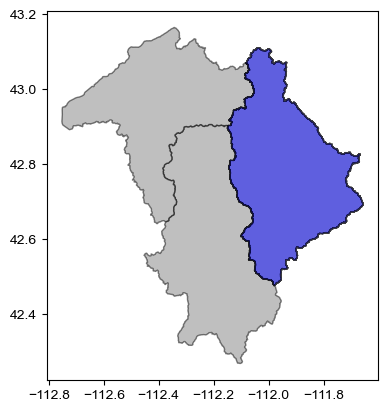

In [14]:
fig, ax = plt.subplots()
aoi.plot(color='grey', edgecolor='black', figsize=(12, 6), alpha=0.5, ax=ax)
aoi[aoi['UID'] == 101].plot(color='blue', edgecolor='black', figsize=(12, 6), alpha=0.5, ax=ax)

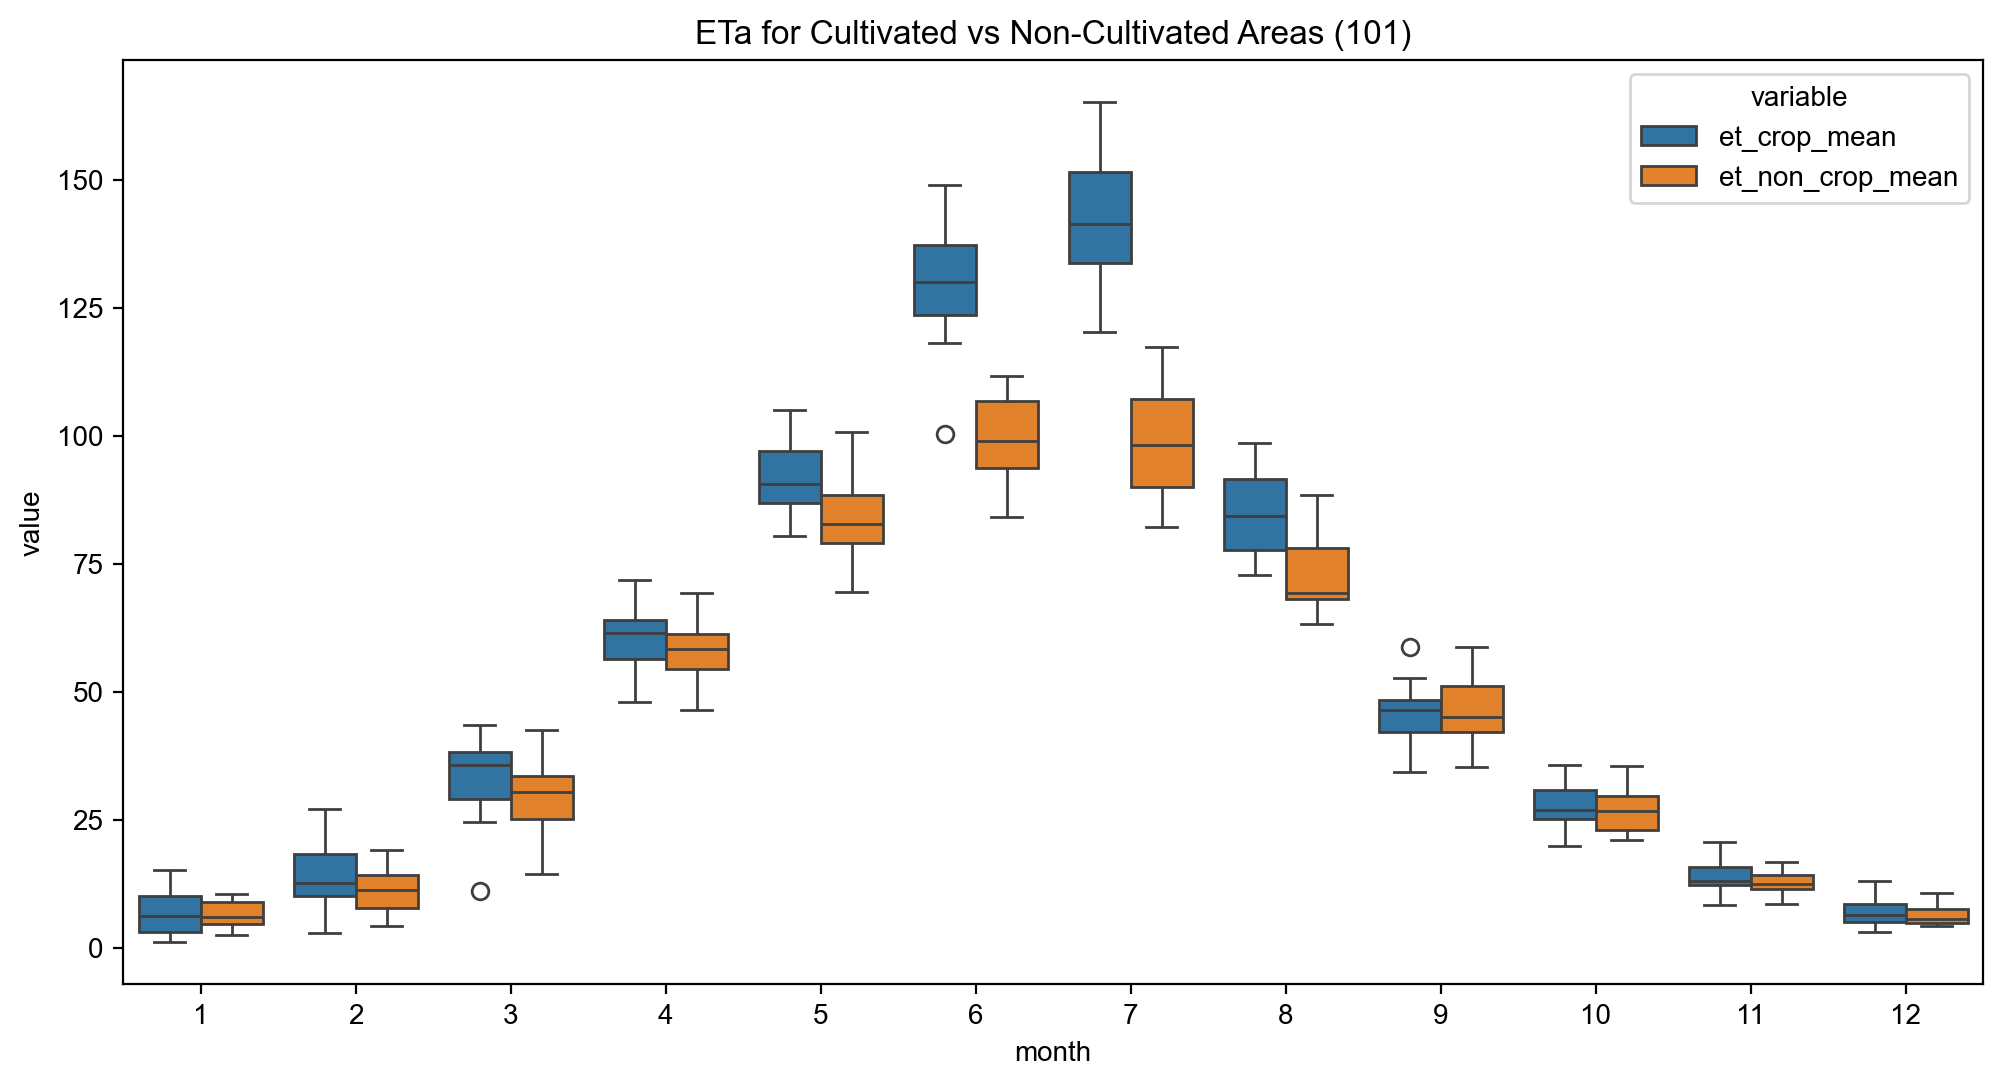

In [15]:
plt.subplots(figsize=(12, 6), dpi=200)
sns.boxplot(data=df_melted[(df_melted['UID'] == 103)], 
            x='month', y='value', hue='variable')
plt.title('ETa for Cultivated vs Non-Cultivated Areas (101)')
plt.savefig('graphics/boxplot_et_c_nc_103.png')
plt.show()


In [16]:


# # Create a figure and GridSpec layout
# fig, axs = plt.subplots(figsize=(12, 6), dpi=200)
# gs = gridspec.GridSpec(1, 1, figure=fig)

# # Main axis for boxplot
# main_ax = fig.add_subplot(gs[0])
# sns.boxplot(
#     data=df_melted[df_melted['UID'] == 103],
#     x='month', y='value', hue='variable', ax=main_ax
# )
# main_ax.set_title('ETa for Cultivated vs Non-Cultivated Areas (103)')

# # Add an inset axis using figure-relative coordinates
# inset_ax = fig.add_axes([0.7, 0.55, 0.25, 0.35])  # [left, bottom, width, height]
# aoi.plot(color='lightgrey', edgecolor='black', ax=inset_ax)
# aoi[aoi['UID'] == 103].plot(color='blue', alpha=0.5, edgecolor='black',ax=inset_ax)
# inset_ax.set_title('AOI UID 103', fontsize=9)
# inset_ax.axis('off')
# inset_ax.set_xticks([])
# inset_ax.set_yticks([])
# # Save and show
# fig.tight_layout()
# fig.savefig('graphics/boxplot_with_inset_using_subplots.png', dpi=300)
# plt.show()


C:\Users\dines\AppData\Local\Temp\ipykernel_17732\3341062240.py:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


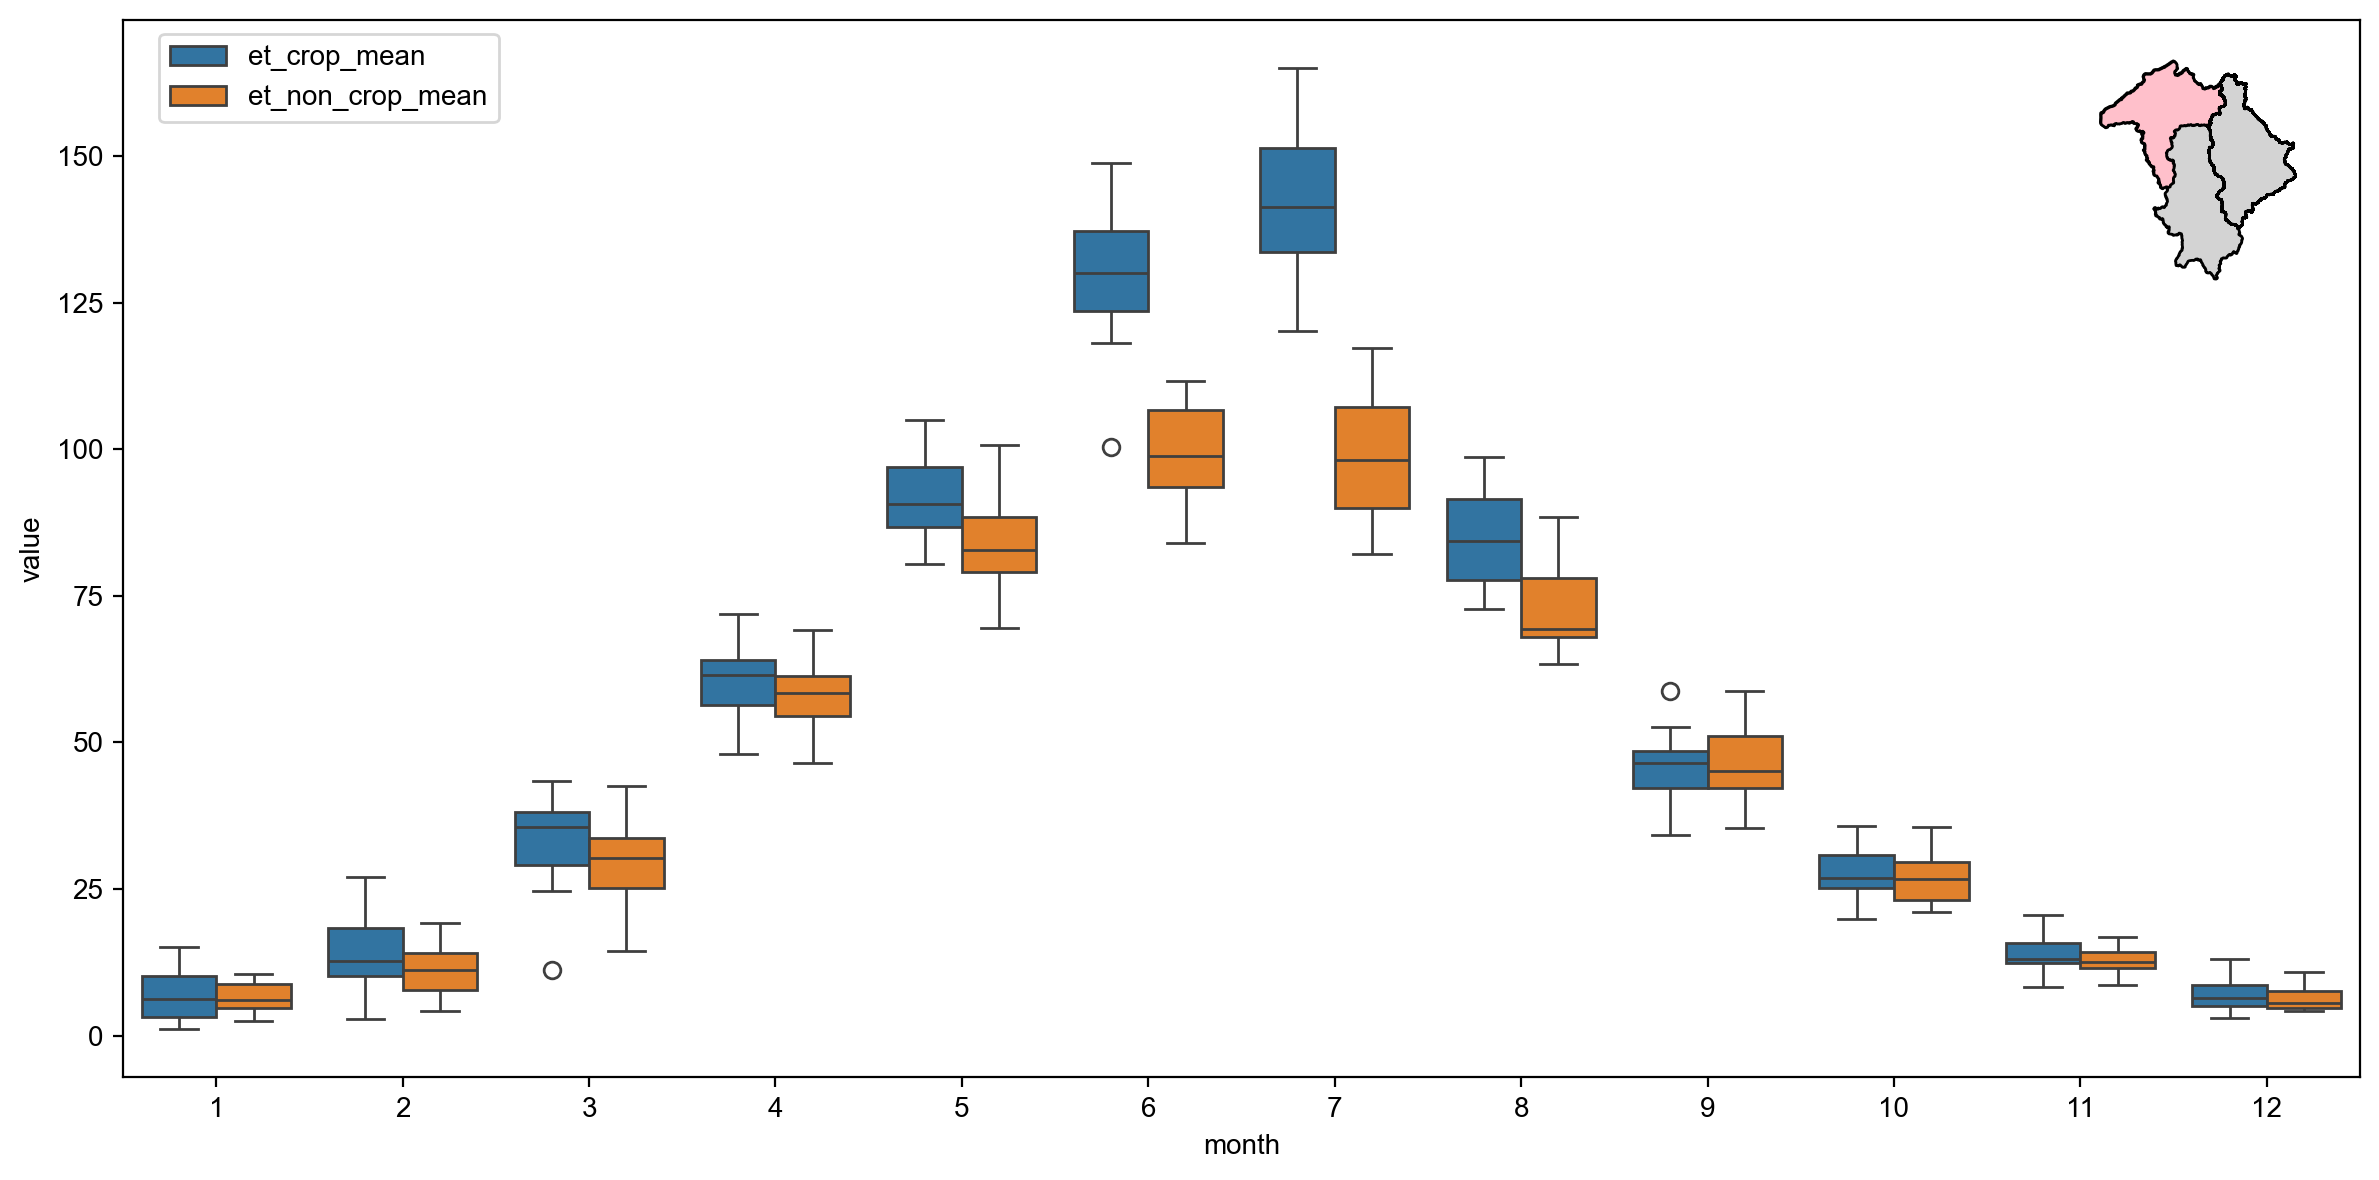

In [47]:

uid = 103
# Main plot
fig, ax = plt.subplots(figsize=(12, 6), dpi=200)
sns.boxplot(data=df_melted[df_melted['UID'] == uid], 
            x='month', y='value', hue='variable', ax=ax)


# Inset axis attached to main ax
map_ax = fig.add_axes([0.82, 0.75, 0.20, 0.20])

aoi.plot(color='lightgrey', edgecolor='black', ax=map_ax)
aoi[aoi['UID'] == uid].plot(color='pink', edgecolor='black', ax=map_ax)
map_ax.axis('off')  # Clean and tick-free
ax.legend(loc='upper left', bbox_to_anchor=(0.01, 1),)
plt.tight_layout()
# plt.savefig('graphics/boxplot_with_clean_inset.png', dpi=300)
plt.show()


In [50]:
df_melted.variable.unique()

array(['et_crop_mean', 'et_non_crop_mean'], dtype=object)

C:\Users\dines\AppData\Local\Temp\ipykernel_17732\3735106642.py:42: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


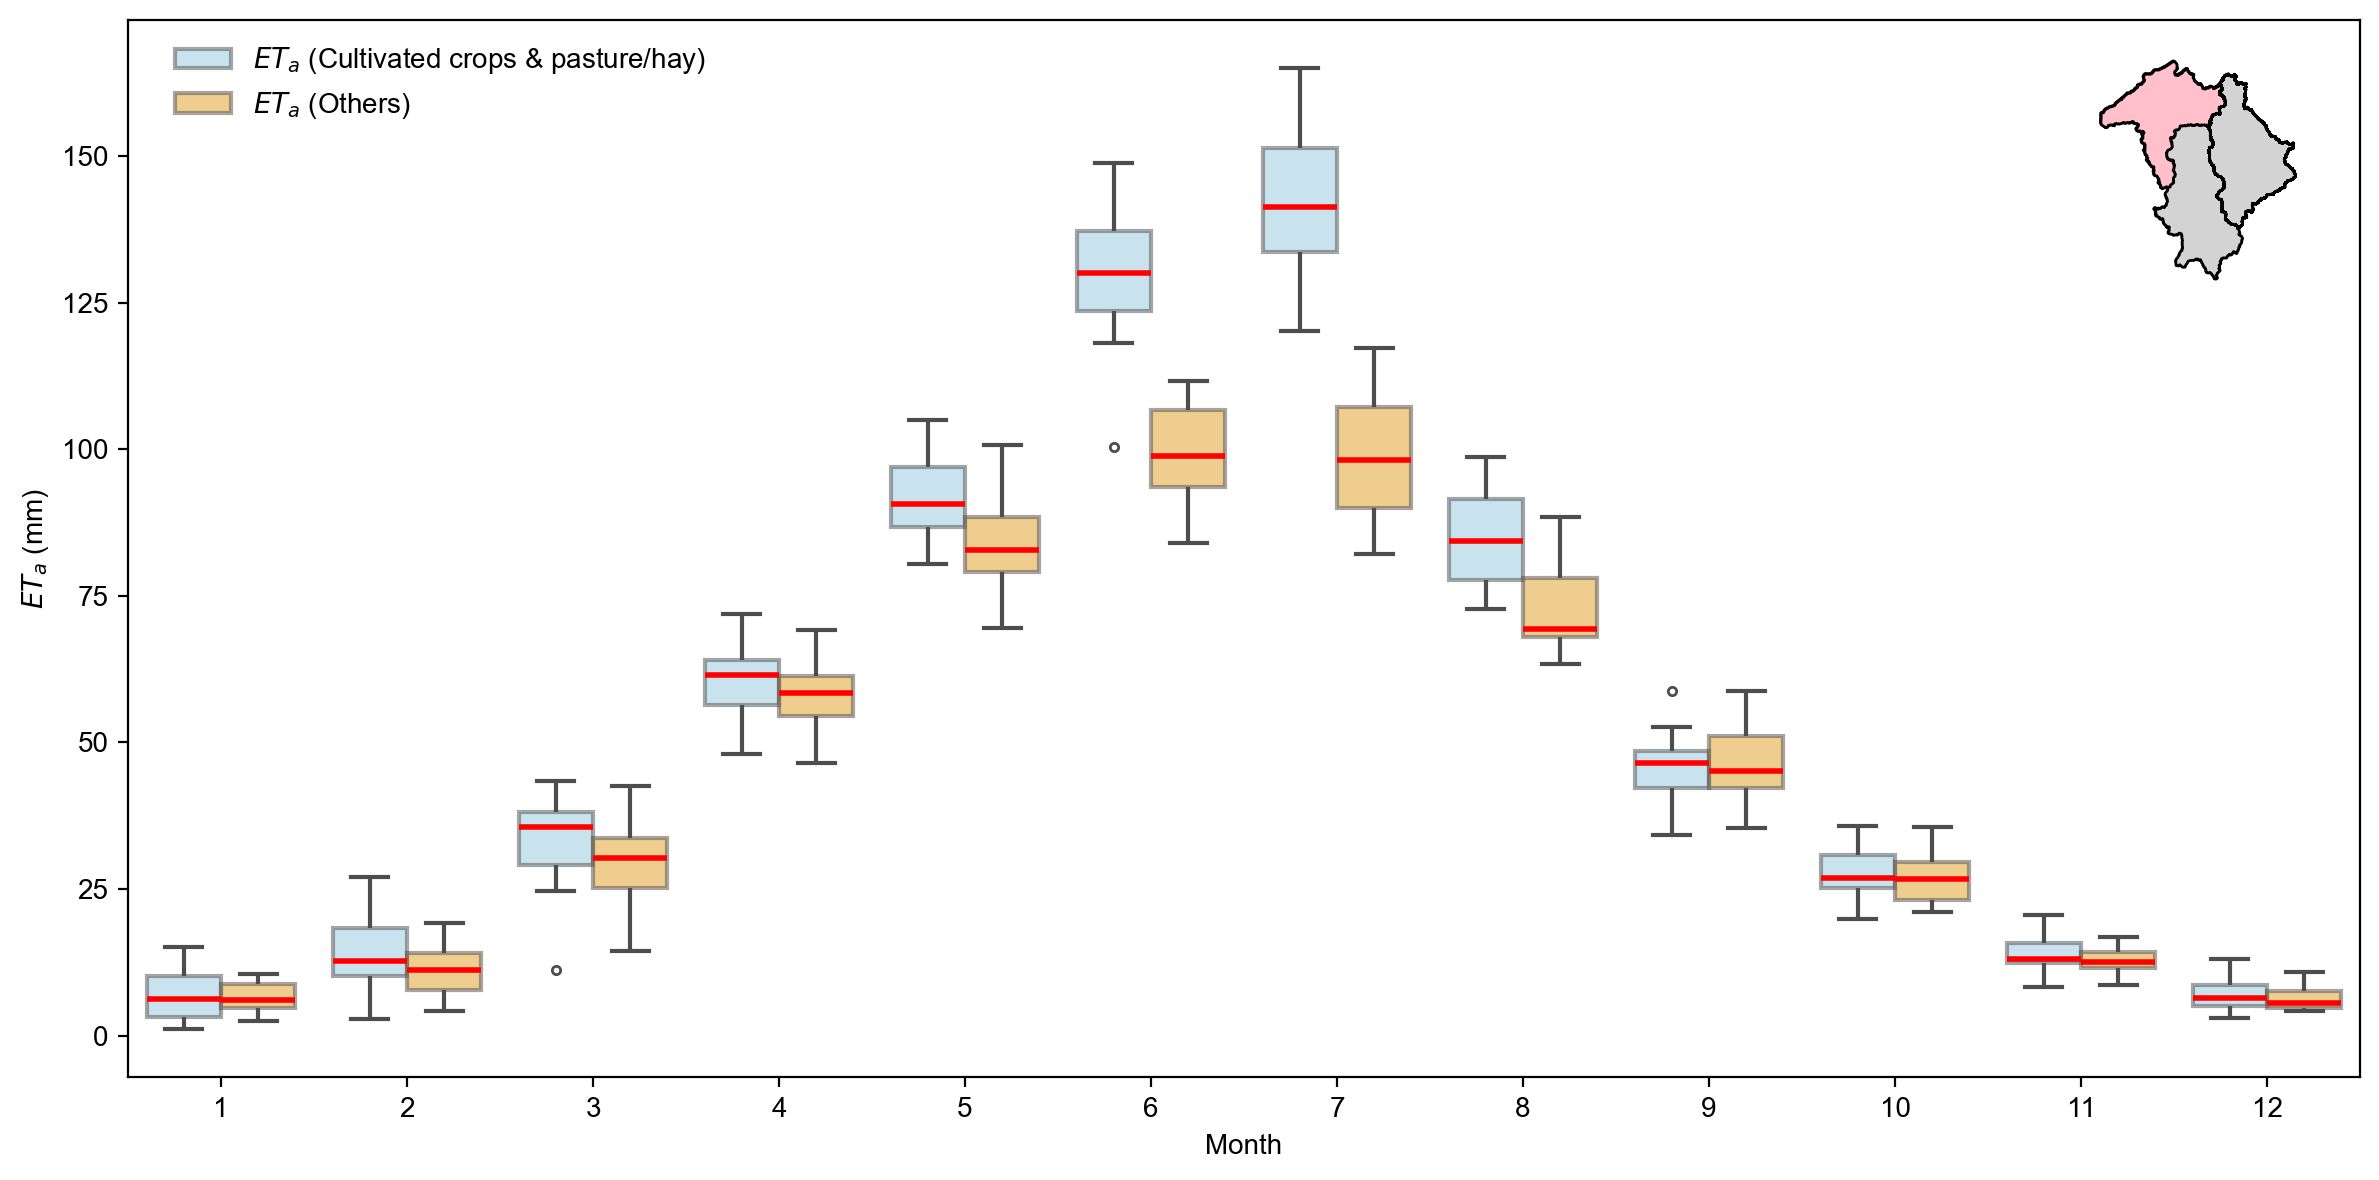

In [60]:
# Set custom colors and labels for the variables
custom_palette = {
    'et_crop_mean': 'skyblue',
    'et_non_crop_mean': 'orange',
}
custom_labels = {
    'et_crop_mean': r'$ET_{a}$ (Cultivated crops & pasture/hay)',
    'et_non_crop_mean': r'$ET_{a}$ (Others)',
}

uid = 103
fig, ax = plt.subplots(figsize=(12, 6), dpi=200)

# Draw the boxplot with enhanced aesthetics
sns.boxplot(
    data=df_melted[df_melted['UID'] == uid], 
    x='month', 
    y='value', 
    hue='variable', 
    ax=ax,
    palette=custom_palette,
    fliersize=3,              
    linewidth=1.5,            
    boxprops=dict(alpha=0.5), 
    medianprops=dict(color='red', linewidth=2),
)

# Set custom legend labels
handles, labels = ax.get_legend_handles_labels()
new_labels = [custom_labels.get(label, label) for label in labels]
ax.legend(handles, new_labels, loc='upper left', bbox_to_anchor=(0.01, 1),frameon=False)

ax.set_ylabel (r'$ET_{a}$ (mm)')
ax.set_xlabel('Month')

# Inset map
map_ax = fig.add_axes([0.82, 0.75, 0.20, 0.20])
aoi.plot(color='lightgrey', edgecolor='black', ax=map_ax)
aoi[aoi['UID'] == uid].plot(color='pink', edgecolor='black', ax=map_ax)
map_ax.axis('off') 

plt.tight_layout()
plt.savefig(f'graphics/bplot_mon_{uid}.png', dpi=300)
plt.show()


In [18]:
df

,Date,UID,et_crop_25th,et_crop_50th,et_crop_75th,et_crop_mean,et_non_crop_25th,et_non_crop_50th,et_non_crop_75th,et_non_crop_mean,month,year,irr_year
3,1999-11-01,101,13.540693,16.000000,20.552231,17.128427,12.574641,17.000000,22.144036,17.669152,11,1999,2000
4,1999-11-01,102,15.000000,19.000000,24.361770,19.669990,12.159116,17.274165,22.222379,17.610902,11,1999,2000
5,1999-11-01,103,7.000000,11.408283,16.391147,12.290382,8.000000,13.172285,19.236326,15.319702,11,1999,2000
6,1999-12-01,101,2.000000,2.000000,4.000000,2.798233,2.193288,3.000000,5.384298,4.093988,12,1999,2000
7,1999-12-01,102,4.000000,5.089329,7.000000,5.309678,2.087410,4.482984,7.000000,5.246109,12,1999,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
898,2024-09-01,102,46.000000,61.000000,87.000000,68.001209,41.328721,58.405954,77.000683,59.706506,9,2024,2024
899,2024-09-01,103,29.411206,43.000000,62.000000,48.569965,23.095575,43.397976,70.459490,48.000786,9,2024,2024
900,2024-10-01,101,27.481839,33.416941,41.000000,35.425061,22.957001,32.066256,44.369470,33.298103,10,2024,2024
901,2024-10-01,102,23.189873,32.213390,49.000000,35.835783,18.000000,30.104095,42.167488,30.485128,10,2024,2024


In [19]:
df1 = df[['Date', 'UID', 'et_crop_mean', 'et_non_crop_mean', 'month', 'year', 'irr_year']].copy()

In [20]:
df1

,Date,UID,et_crop_mean,et_non_crop_mean,month,year,irr_year
3,1999-11-01,101,17.128427,17.669152,11,1999,2000
4,1999-11-01,102,19.669990,17.610902,11,1999,2000
5,1999-11-01,103,12.290382,15.319702,11,1999,2000
6,1999-12-01,101,2.798233,4.093988,12,1999,2000
7,1999-12-01,102,5.309678,5.246109,12,1999,2000
...,...,...,...,...,...,...,...
898,2024-09-01,102,68.001209,59.706506,9,2024,2024
899,2024-09-01,103,48.569965,48.000786,9,2024,2024
900,2024-10-01,101,35.425061,33.298103,10,2024,2024
901,2024-10-01,102,35.835783,30.485128,10,2024,2024


In [21]:
agg_irr_yr = df1.groupby(['irr_year', 'UID']).agg(
    et_tot = ('et_crop_mean', 'sum'),
    et_tot_nc = ('et_non_crop_mean', 'sum')
).reset_index()

In [22]:
agg_irr_yr

,irr_year,UID,et_tot,et_tot_nc
0,2000,101,582.777292,553.235401
1,2000,102,563.822954,518.041250
2,2000,103,645.669766,536.939822
3,2001,101,515.792803,503.912170
4,2001,102,474.311048,477.669645
...,...,...,...,...
70,2023,102,568.703415,574.008383
71,2023,103,650.387541,564.783819
72,2024,101,600.472987,623.539194
73,2024,102,607.171994,590.378952


<Axes: xlabel='irr_year', ylabel='et_tot'>

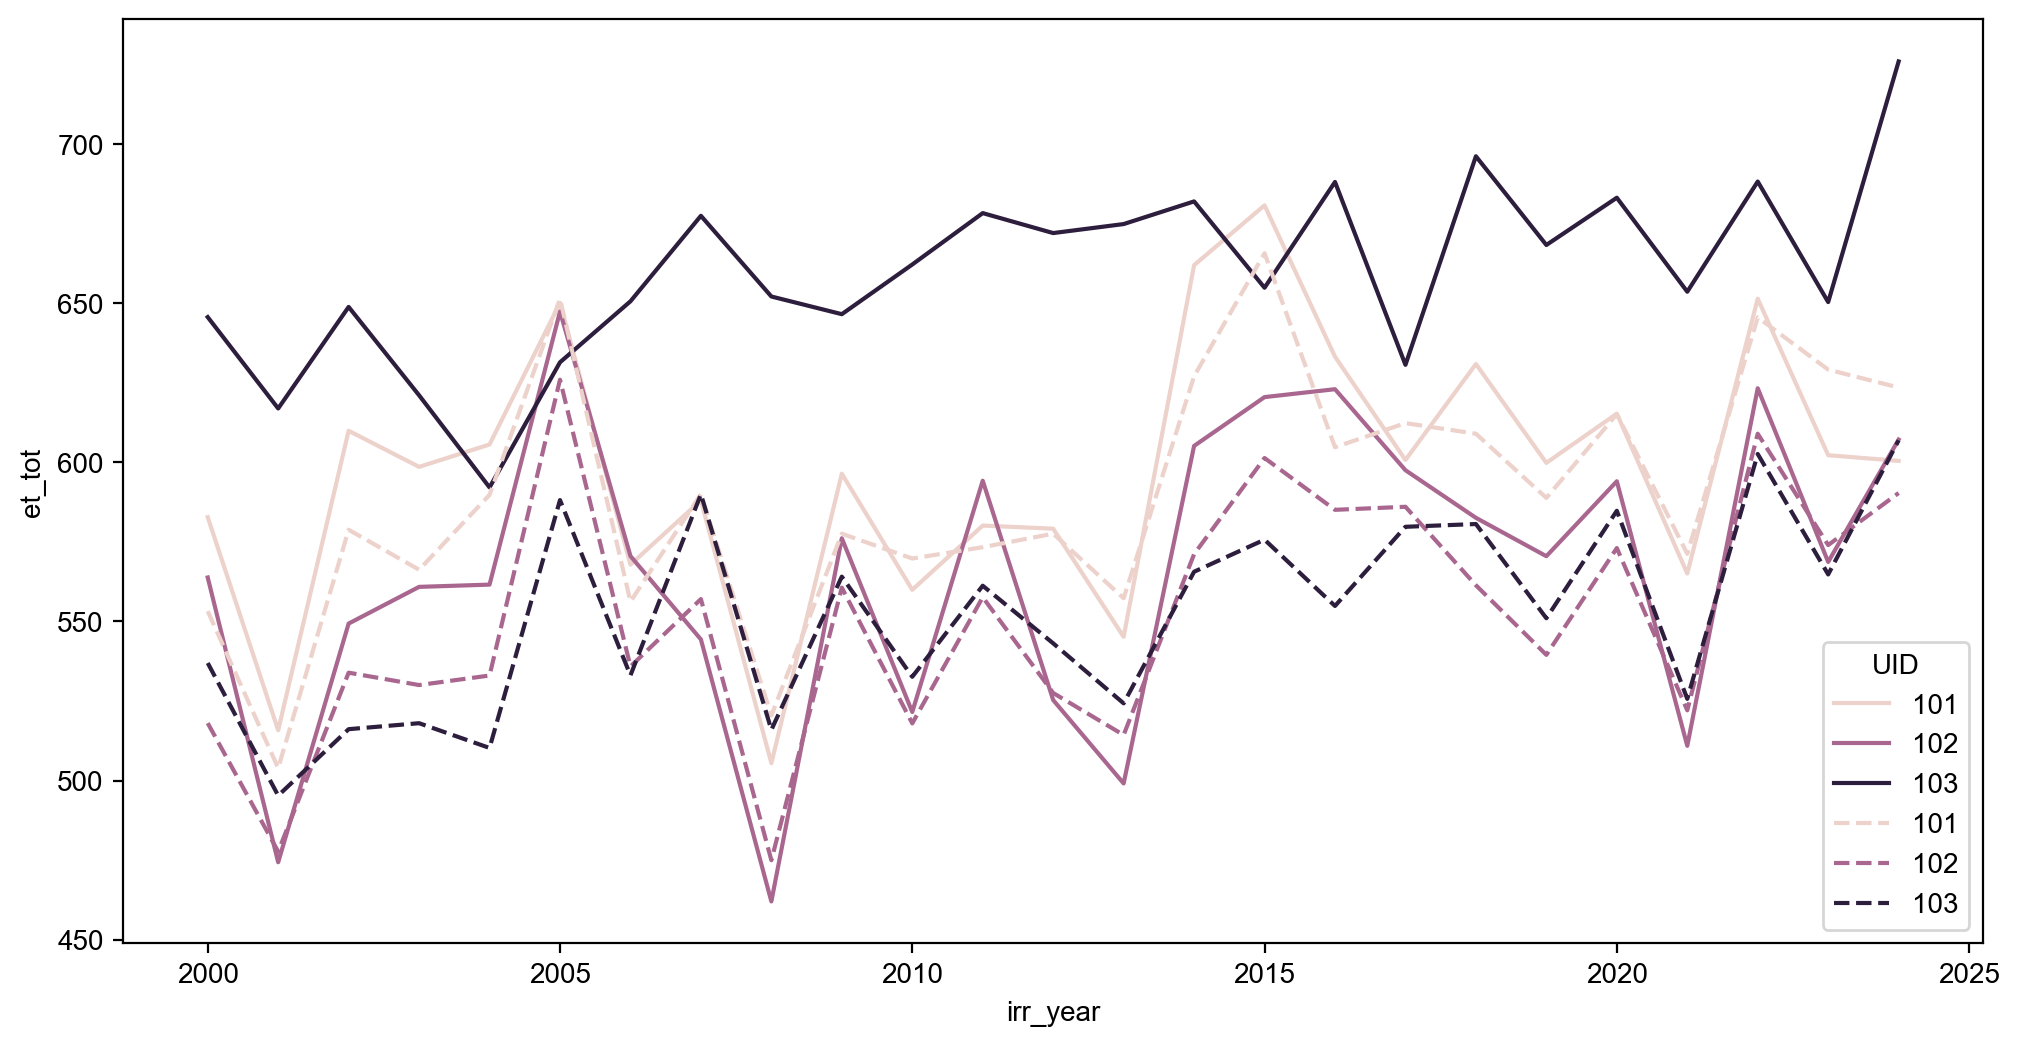

In [23]:
plt.subplots(figsize=(12,6), dpi=200)
sns.lineplot(data=agg_irr_yr, x='irr_year', y='et_tot', hue='UID')
sns.lineplot(data=agg_irr_yr, x='irr_year', y='et_tot_nc', hue='UID', linestyle='--')

In [24]:
agg_irr_yr_bas = agg_irr_yr.groupby('irr_year').agg(
    et_mean =  ('et_tot', 'mean'),
    et_std =   ('et_tot', 'std'),
    et_mean_nc = ('et_tot_nc', 'mean'),
    et_std_nc =  ('et_tot_nc', 'std')
).reset_index()

In [25]:
agg_irr_yr_bas

,irr_year,et_mean,et_std,et_mean_nc,et_std_nc
0,2000,597.423337,42.843963,536.072158,17.613111
1,2001,535.683811,73.369165,492.282855,13.373304
2,2002,602.715458,50.157953,542.955983,32.309194
3,2003,593.517357,30.428337,538.096185,25.117214
4,2004,586.443861,22.567212,544.346406,40.969405
5,2005,643.013563,10.098794,621.861517,31.841236
6,2006,596.349679,47.031973,541.709039,12.654270
7,2007,603.307289,67.875109,579.017714,19.041971
8,2008,539.861426,99.637011,503.761363,25.060466
9,2009,606.392227,36.256768,567.431460,8.965879


In [26]:
def plot_timeseries_with_std(df, year_col, mean_col, std_col, ylabel, title, color='tab:green', color2='tab:red', save_path=None):
    years = df[year_col]
    mean = df[mean_col]
    std = df[std_col]
    mean_nc = df[f'{mean_col}_nc']
    std_nc = df[f'{std_col}_nc']

    fig, ax = plt.subplots(figsize=(10, 6))

    # Fill ±1 std
    ax.fill_between(years, mean - std, mean + std, color=color, alpha=0.3, label='±1 Std Dev')
    ax.fill_between(years, mean_nc - std_nc, mean_nc + std_nc, color=color2, alpha=0.3, label='±1 Std Dev')

    # Plot mean line
    ax.plot(years, mean, color=color, marker='o', label='Mean (cultivated+pasture)')
    ax.plot(years, mean_nc, color=color2, marker='o', label='Mean (others)')

    # Labels and aesthetics
    ax.set_title(title, fontsize=14)
    ax.set_xlabel("Irrigation Year")
    ax.set_ylabel(ylabel)
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.legend()
    ax.set_axisbelow(True)
    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Saved: {save_path}")
    
    plt.show()


Saved: graphics/annual_eta_bas_c_nc.png


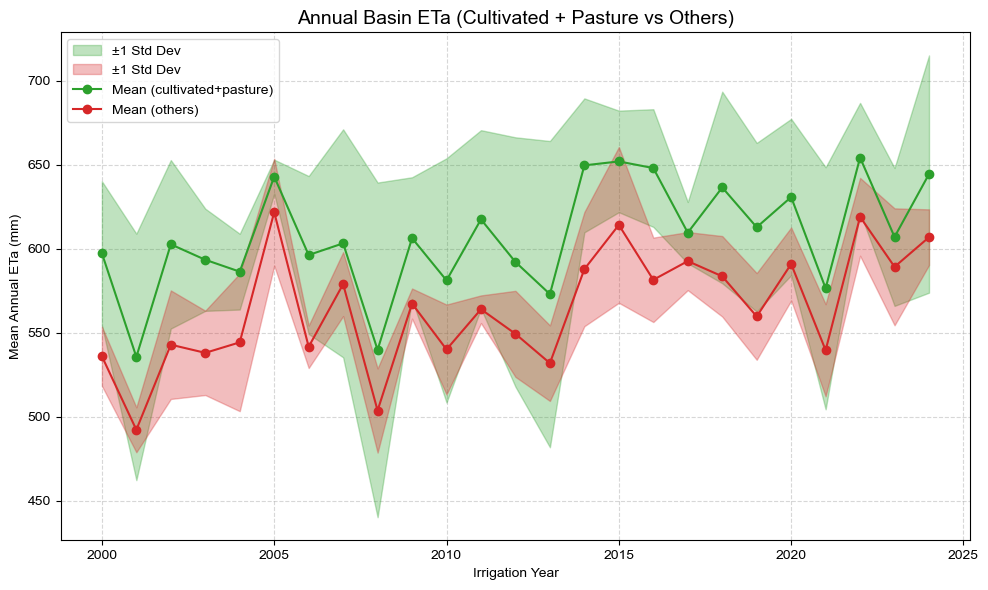

In [27]:
plot_timeseries_with_std(
    df=agg_irr_yr_bas,
    year_col='irr_year',
    mean_col='et_mean',
    std_col='et_std',
    ylabel='Mean Annual ETa (mm)',
    title='Annual Basin ETa (Cultivated + Pasture vs Others)',
    save_path='graphics/annual_eta_bas_c_nc.png'
)

In [28]:
df

,Date,UID,et_crop_25th,et_crop_50th,et_crop_75th,et_crop_mean,et_non_crop_25th,et_non_crop_50th,et_non_crop_75th,et_non_crop_mean,month,year,irr_year
3,1999-11-01,101,13.540693,16.000000,20.552231,17.128427,12.574641,17.000000,22.144036,17.669152,11,1999,2000
4,1999-11-01,102,15.000000,19.000000,24.361770,19.669990,12.159116,17.274165,22.222379,17.610902,11,1999,2000
5,1999-11-01,103,7.000000,11.408283,16.391147,12.290382,8.000000,13.172285,19.236326,15.319702,11,1999,2000
6,1999-12-01,101,2.000000,2.000000,4.000000,2.798233,2.193288,3.000000,5.384298,4.093988,12,1999,2000
7,1999-12-01,102,4.000000,5.089329,7.000000,5.309678,2.087410,4.482984,7.000000,5.246109,12,1999,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
898,2024-09-01,102,46.000000,61.000000,87.000000,68.001209,41.328721,58.405954,77.000683,59.706506,9,2024,2024
899,2024-09-01,103,29.411206,43.000000,62.000000,48.569965,23.095575,43.397976,70.459490,48.000786,9,2024,2024
900,2024-10-01,101,27.481839,33.416941,41.000000,35.425061,22.957001,32.066256,44.369470,33.298103,10,2024,2024
901,2024-10-01,102,23.189873,32.213390,49.000000,35.835783,18.000000,30.104095,42.167488,30.485128,10,2024,2024


In [29]:
df_jjas = df[(df['month'].isin([6, 7, 8, 9])) & (df['irr_year'] >= 2000) & (df['irr_year'] <= 2024)].copy()

In [30]:
df_jjas

,Date,UID,et_crop_25th,et_crop_50th,et_crop_75th,et_crop_mean,et_non_crop_25th,et_non_crop_50th,et_non_crop_75th,et_non_crop_mean,month,year,irr_year
24,2000-06-01,101,91.000000,120.000000,148.0,116.705524,84.048627,112.387782,138.000000,111.063999,6,2000,2000
25,2000-06-01,102,67.000000,101.285430,143.0,103.376512,67.487740,100.810509,134.799766,101.035109,6,2000,2000
26,2000-06-01,103,106.425618,141.000000,184.0,139.697105,59.121613,99.242727,143.275686,102.503577,6,2000,2000
27,2000-07-01,101,75.000000,130.000000,178.0,124.086120,58.271281,89.246132,124.317981,92.849951,7,2000,2000
28,2000-07-01,102,36.000000,71.000000,139.0,87.595510,40.342904,73.098340,116.467935,80.037082,7,2000,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,2024-08-01,102,47.000000,74.000000,116.0,82.242122,51.616456,80.408368,110.378795,81.812431,8,2024,2024
896,2024-08-01,103,56.000000,78.467725,123.0,89.595738,43.000000,79.218897,120.174427,83.608781,8,2024,2024
897,2024-09-01,101,41.145765,54.441769,73.0,58.606569,40.656927,58.373385,78.429784,60.045894,9,2024,2024
898,2024-09-01,102,46.000000,61.000000,87.0,68.001209,41.328721,58.405954,77.000683,59.706506,9,2024,2024


C:\Users\dines\AppData\Local\Temp\ipykernel_17732\868927473.py:55: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.96])


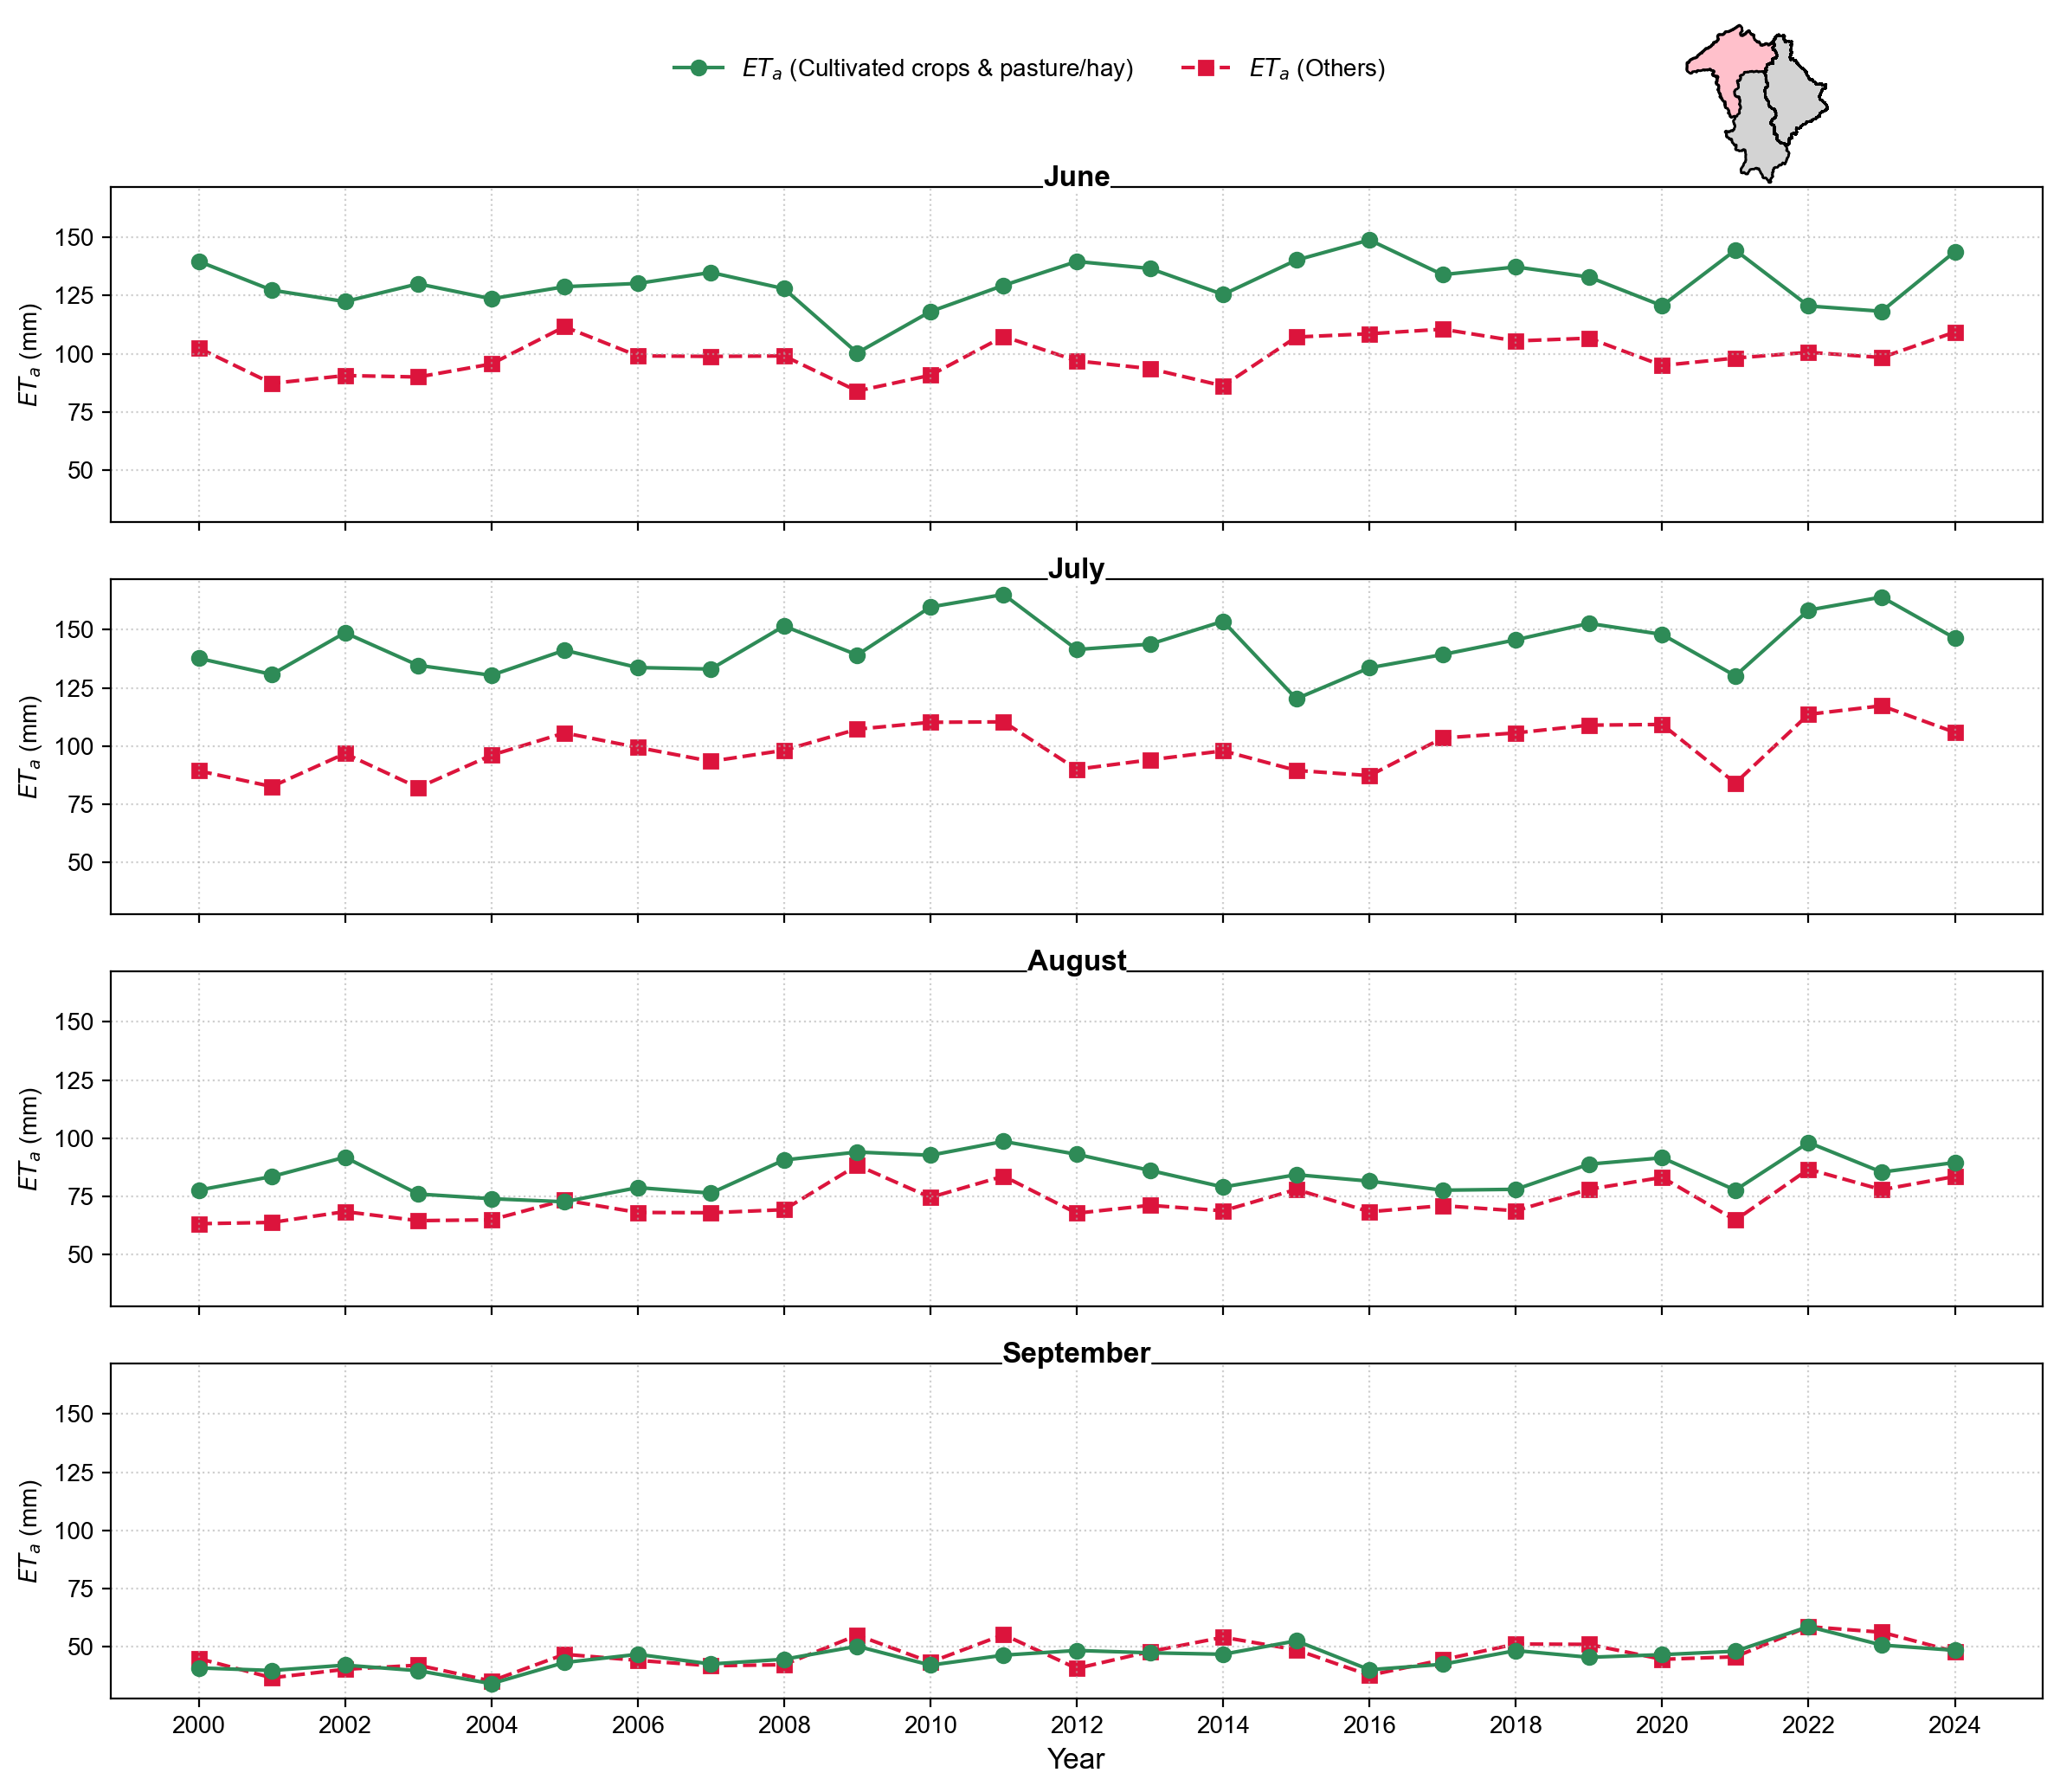

In [ ]:
uid = 103
fig, axes = plt.subplots(4, 1, figsize=(12, 10), dpi=200, sharex=True, sharey=True)

# Styling maps
linestyles = {
    'crop': '-',
    'non_crop': '--'
}
markers = {
    'crop': 'o',
    'non_crop': 's'
}

# Placeholder for legend handles
handles, labels = None, None

# Plot monthly data
for ax_idx, (ax, month, month_name) in enumerate(zip(axes, [6, 7, 8, 9], ['June', 'July', 'August', 'September'])):
    df_temp = df_jjas[(df_jjas['UID'] == uid) & (df_jjas['month'] == month)]
    
    line1, = ax.plot(df_temp['year'], df_temp['et_crop_mean'], 
                     label=r'$ET_{a}$ (Cultivated crops & pasture/hay)', 
                     color='seagreen', 
                     linestyle=linestyles['crop'], 
                     marker=markers['crop'], zorder=2)
    line2, = ax.plot(df_temp['year'], df_temp['et_non_crop_mean'], 
                     label=r'$ET_{a}$ (Others)', 
                     color='crimson', 
                     linestyle=linestyles['non_crop'], 
                     marker=markers['non_crop'], zorder=1)
    # Add the title inside the plot
    ax.text(0.5, 0.985, month_name, transform=ax.transAxes, ha="center", va="bottom",
    fontsize=12, fontfamily='Arial', weight='bold',
    bbox=dict(facecolor='white', edgecolor='none', boxstyle='round', pad=0))
    
    if ax_idx == 0:
        handles, labels = ax.get_legend_handles_labels()
    
    ax.set_ylabel(r'$ET_{a}$ (mm)')
    ax.set_xticks(df_temp['year'].iloc[::2])
    ax.grid(True, linestyle=':', alpha=0.6)

axes[-1].set_xlabel('Year', fontsize=12)

# Add single figure-level legend
fig.legend(handles, labels, loc='upper center', ncol=2, bbox_to_anchor=(0.5, 1.02), frameon=False)

# ---------------- Figure-Level Inset Map ----------------
map_ax = fig.add_axes([0.80, 0.93, 0.10, 0.10])  # [left, bottom, width, height]
aoi.plot(color='lightgrey', edgecolor='black', ax=map_ax)
aoi[aoi['UID'] == uid].plot(color='pink', edgecolor='black', ax=map_ax, label='Selected UID')
map_ax.axis('off')

# Layout adjustment
plt.tight_layout(rect=[0, 0, 1, 0.96])
#plt.savefig(f'graphics/et_jjas_{uid}.png', dpi=300, bbox_inches='tight')
plt.show()
